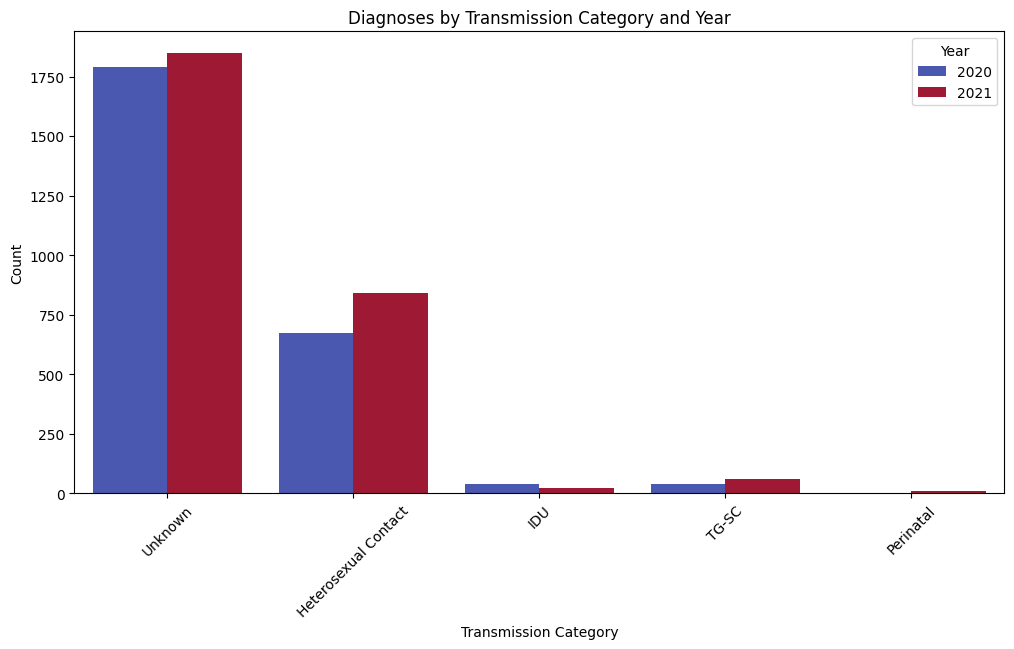

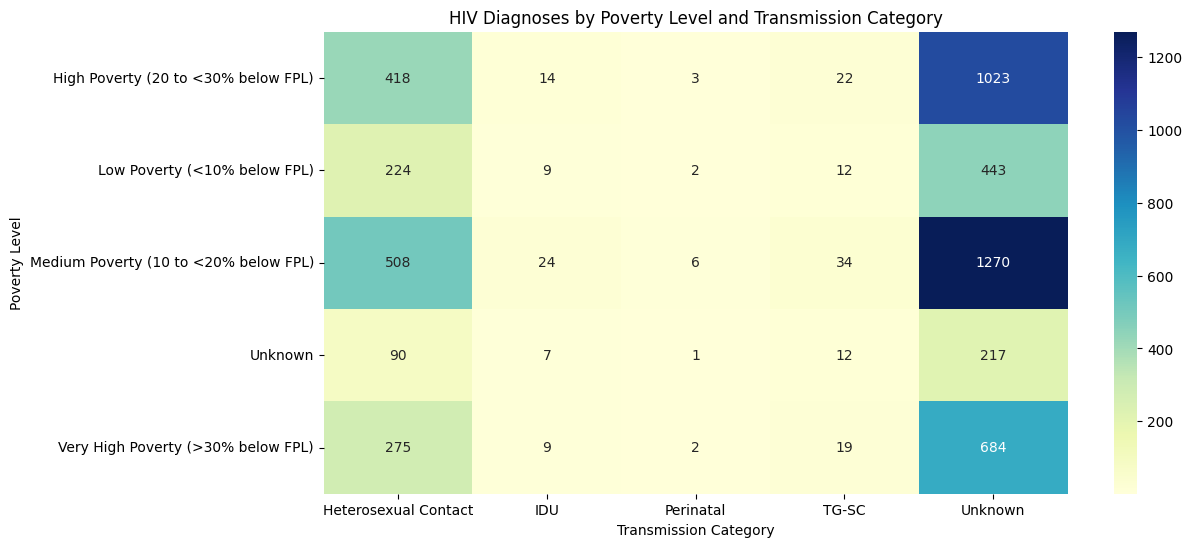

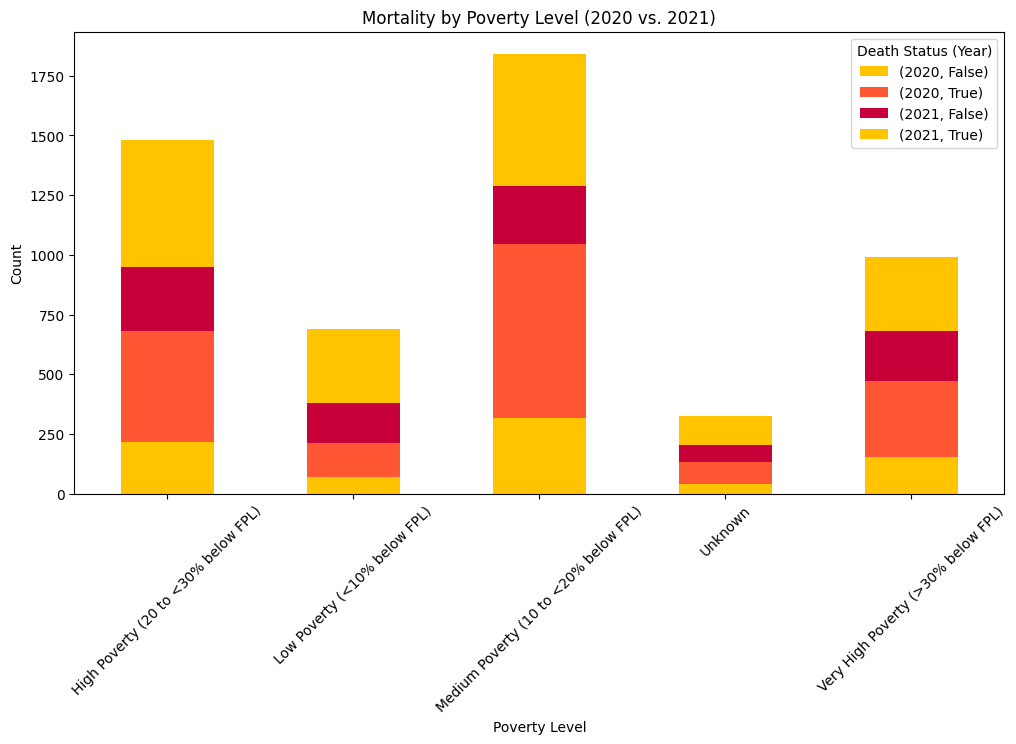

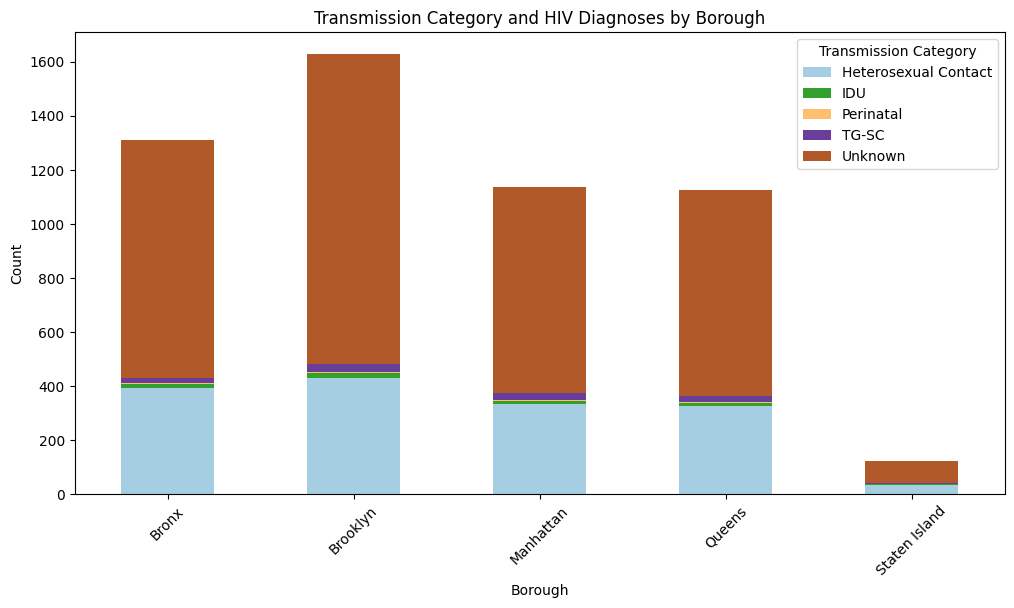

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file

data = pd.read_csv("processed_final.csv")

# Filter rows for 2020 and 2021
filtered_data = data[(data['Year'] == 2020) | (data['Year'] == 2021)]

# Visualization 1: Diagnoses by Transmission Category and Year
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Transmission Category', hue='Year', palette="coolwarm")
plt.title("Diagnoses by Transmission Category and Year")
plt.ylabel("Count")
plt.xlabel("Transmission Category")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()

# Visualization 2: Diagnoses by Poverty Level and Transmission Category
poverty_transmission = filtered_data.groupby(['Poverty Level', 'Transmission Category'])[["HIV_diagnosed", "AIDS_diagnosed"]].sum().reset_index()
pivot_table = poverty_transmission.pivot(index="Poverty Level", columns="Transmission Category", values="HIV_diagnosed")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("HIV Diagnoses by Poverty Level and Transmission Category")
plt.ylabel("Poverty Level")
plt.xlabel("Transmission Category")
plt.show()

# Visualization 3: Poverty Level and Mortality
mortality_poverty = filtered_data.groupby(['Poverty Level', 'Year', 'Death_status']).size().reset_index(name="Count")
mortality_pivot = mortality_poverty.pivot_table(values='Count', index='Poverty Level', columns=['Year', 'Death_status'], fill_value=0)

mortality_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FFC300', '#FF5733', '#C70039'])
plt.title("Mortality by Poverty Level (2020 vs. 2021)")
plt.ylabel("Count")
plt.xlabel("Poverty Level")
plt.legend(title="Death Status (Year)")
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Transmission Category and Diagnoses by Borough
transmission_borough = filtered_data.groupby(['Borough', 'Transmission Category'])[["HIV_diagnosed", "AIDS_diagnosed"]].sum().reset_index()
transmission_pivot = transmission_borough.pivot_table(values='HIV_diagnosed', index='Borough', columns='Transmission Category', fill_value=0)

transmission_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")
plt.title("Transmission Category and HIV Diagnoses by Borough")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.legend(title="Transmission Category")
plt.xticks(rotation=45)
plt.show()

In [10]:
#validity check between the two dataset we see if matching

male_count_2020 = data[(data['Year'] == 2020) & (data['Gender'].str.contains('men', case=False))].shape[0]

male_count_2020

2547